# Capstone Project - House Price Prediction

### Current situation :
The current approach is to estimate the house price is manual and based on expert opinions or individual's judgment. Most the cases price is decided based on similar property price in that locality and does not consider all the potentail factors that might influenced the property price.AND, mojaority of the cases that leads to incorrect estimatation of house price and financial loss or oppotunity loss for both buyer and seller.

### Opportunity for improvement:
We can build an sophisticated predictive model to estimate the house price which will consider all the factors that are effecting price of the property. And, also this model will helps buyer/seller to understand which factor/factors is/are most significant one and how they are influcneing the property price. Based on the input parameters it will predict the best value of the property price and reduce the manual interven.

### Data requirement and challenges:
House price not only depends on some of the known factors like location and square footage, there are several others macro/micro economic factors that influence the property prices. We need both the present and past data of all the factors to estimate the house price and also helps us assess the model performance. 
Collect the data from diffent platfrom and sources and consolidated it in a sinlge database/dataset is one of the biggest challenge for building the model. And, we need more than 1000 observations to build a sophisticated and stable model which add more challenges to the exsisting problem. 
But here, we already have dataset with us to our excercise. The entire dataset has 23 variables and 21613 observations. 

##### Data dictionary :
1. cid: a notation for a house   
2. dayhours: Date house was sold  
3. price: Price is prediction target  
4. room_bed: Number of Bedrooms/House  
5. room_bath: Number of bathrooms/bedrooms  
6. living_measure: square footage of the home  
7. lot_measure: quare footage of the lot  
8. ceil: Total floors (levels) in house  
9. coast: House which has a view to a waterfront  
10. sight: Has been viewed  
11. condition: How good the condition is (Overall)  
12. quality: grade given to the housing unit, based on grading system  
13. ceil_measure: square footage of house apart from basement  
14. basement_measure: square footage of the basement  
15. yr_built: Built Year  
16. yr_renovated: Year when house was renovated  
17. zipcode: zip  
18. lat: Latitude coordinate  
19. long: Longitude coordinate  
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area  
21. lot_measure15: lotSize area in 2015(implies-- some renovations)  
22. furnished: Based on the quality of room
23. total_area: Measure of both living and lot  

## 1. Importing dataset and libraries

#### 1.1 Importing required libraries

In [1]:
# Dataframe and Array
import pandas as pd
import numpy as np

# Graph and visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt

# Data preprocessing and transformation

from sklearn.model_selection  import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Modelling algorithm

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Clustering
from sklearn.cluster import KMeans

# Feature selection
from sklearn.decomposition import PCA

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Control search
from sklearn.model_selection import GridSearchCV

# Performance and accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### 1.2 Importing dataset

In [10]:
house_df = pd.read_csv('.\datasets\innercity.csv')

In [66]:
house_df.head()

cid         dayhours    price  room_bed  room_bath  living_measure  \
0  2424059174  20150508T000000  2000000         4       3.25            5640   
1  4385700250  20150407T000000  1800000         4       3.50            3480   
2  6600000050  20150310T000000  1700000         4       3.50            3950   
3  2652501565  20150423T000000  1550000         3       3.25            3530   
4  8691440220  20150202T000000  1290000         5       4.00            4360   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        35006   2.0      0      2  ...       740      2015             0   
1         4000   2.0      0      0  ...      1020      2015             0   
2         6240   2.0      0      0  ...         0      2015             0   
3         4920   2.0      0      0  ...       870      2015             0   
4         8030   2.0      0      0  ...         0      2015             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98006  47.5491 -122.104              4920          35033          1   
1    98112  47.6356 -122.281              2620           4000          1   
2    98112  47.6221 -122.290              2040           6240          1   
3    98109  47.6410 -122.357              1900           4200          1   
4    98075  47.5923 -121.973              3570           6185          1   

   total_area  
0       40646  
1        7480  
2       10190  
3        8450  
4       12390  

[5 rows x 23 columns]

### 2 : Exploratory Data Analysis (EDA)

In [67]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [68]:
house_df.drop('cid',axis=1,inplace=True)

In [69]:
house_df.describe().transpose()

count           mean            std         min  \
price             21613.0  540182.158793  367362.231718  75000.0000   
room_bed          21613.0       3.370842       0.930062      0.0000   
room_bath         21613.0       2.114757       0.770163      0.0000   
living_measure    21613.0    2079.899736     918.440897    290.0000   
lot_measure       21613.0   15106.967566   41420.511515    520.0000   
ceil              21613.0       1.494309       0.539989      1.0000   
coast             21613.0       0.007542       0.086517      0.0000   
sight             21613.0       0.234303       0.766318      0.0000   
condition         21613.0       3.409430       0.650743      1.0000   
quality           21613.0       7.656873       1.175459      1.0000   
ceil_measure      21613.0    1788.390691     828.090978    290.0000   
basement          21613.0     291.509045     442.575043      0.0000   
yr_built          21613.0    1971.005136      29.373411   1900.0000   
yr_renovated      21613.0      84.402258     401.679240      0.0000   
zipcode           21613.0   98077.939805      53.505026  98001.0000   
lat               21613.0      47.560053       0.138564     47.1559   
long              21613.0    -122.213896       0.140828   -122.5190   
living_measure15  21613.0    1986.552492     685.391304    399.0000   
lot_measure15     21613.0   12768.455652   27304.179631    651.0000   
furnished         21613.0       0.196687       0.397503      0.0000   
total_area        21613.0   17186.867302   41589.081215   1423.0000   

                         25%          50%         75%           max  
price             321950.000  450000.0000  645000.000  7.700000e+06  
room_bed               3.000       3.0000       4.000  3.300000e+01  
room_bath              1.750       2.2500       2.500  8.000000e+00  
living_measure      1427.000    1910.0000    2550.000  1.354000e+04  
lot_measure         5040.000    7618.0000   10688.000  1.651359e+06  
ceil                   1.000       1.5000       2.000  3.500000e+00  
coast                  0.000       0.0000       0.000  1.000000e+00  
sight                  0.000       0.0000       0.000  4.000000e+00  
condition              3.000       3.0000       4.000  5.000000e+00  
quality                7.000       7.0000       8.000  1.300000e+01  
ceil_measure        1190.000    1560.0000    2210.000  9.410000e+03  
basement               0.000       0.0000     560.000  4.820000e+03  
yr_built            1951.000    1975.0000    1997.000  2.015000e+03  
yr_renovated           0.000       0.0000       0.000  2.015000e+03  
zipcode            98033.000   98065.0000   98118.000  9.819900e+04  
lat                   47.471      47.5718      47.678  4.777760e+01  
long                -122.328    -122.2300    -122.125 -1.213150e+02  
living_measure15    1490.000    1840.0000    2360.000  6.210000e+03  
lot_measure15       5100.000    7620.0000   10083.000  8.712000e+05  
furnished              0.000       0.0000       0.000  1.000000e+00  
total_area          7035.000    9575.0000   13000.000  1.652659e+06

##### Few observations could be made based on describe function output:
    1. Dataset is having a house with 11 and a house with 33 bedrooms. These may be outliers and we can have a look at this as we proceed.
    2. Maximum square feet is 13540 and minimum is 290. The data seems to be distributed.
    3. Maximum total area is 1652659 and minimum is 41589. From this too we can say data is distributed.
    4. Though the maximum is 33 and minimum is 0 for no of bedrooms in house, the median is 3 and 75% is 4. So most of the houses have 3 followed by 4 bedrooms.
    5. The data has room_bed feature which could be no of bathrooms in the house.If we observe the values, they are in decimals ranging from 0 to 8. So this could be thought of as a rating for the quality of the bathroom.
    6. Year in which the house was built is ranging from 1900 to 2015. from percentile values we can that houses built in 1951, 1975 and 1997 are sold more.

In [70]:
house_df.shape

(21613, 22)

In [71]:
#checking for null values
house_df.isnull().sum().sort_values(ascending = False)

total_area          0
furnished           0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
dayhours            0
dtype: int64

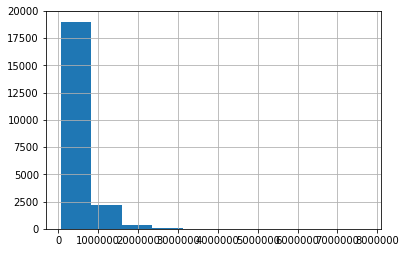

In [72]:
#Checking the distribution of the target variable: Price
house_df.price.hist()

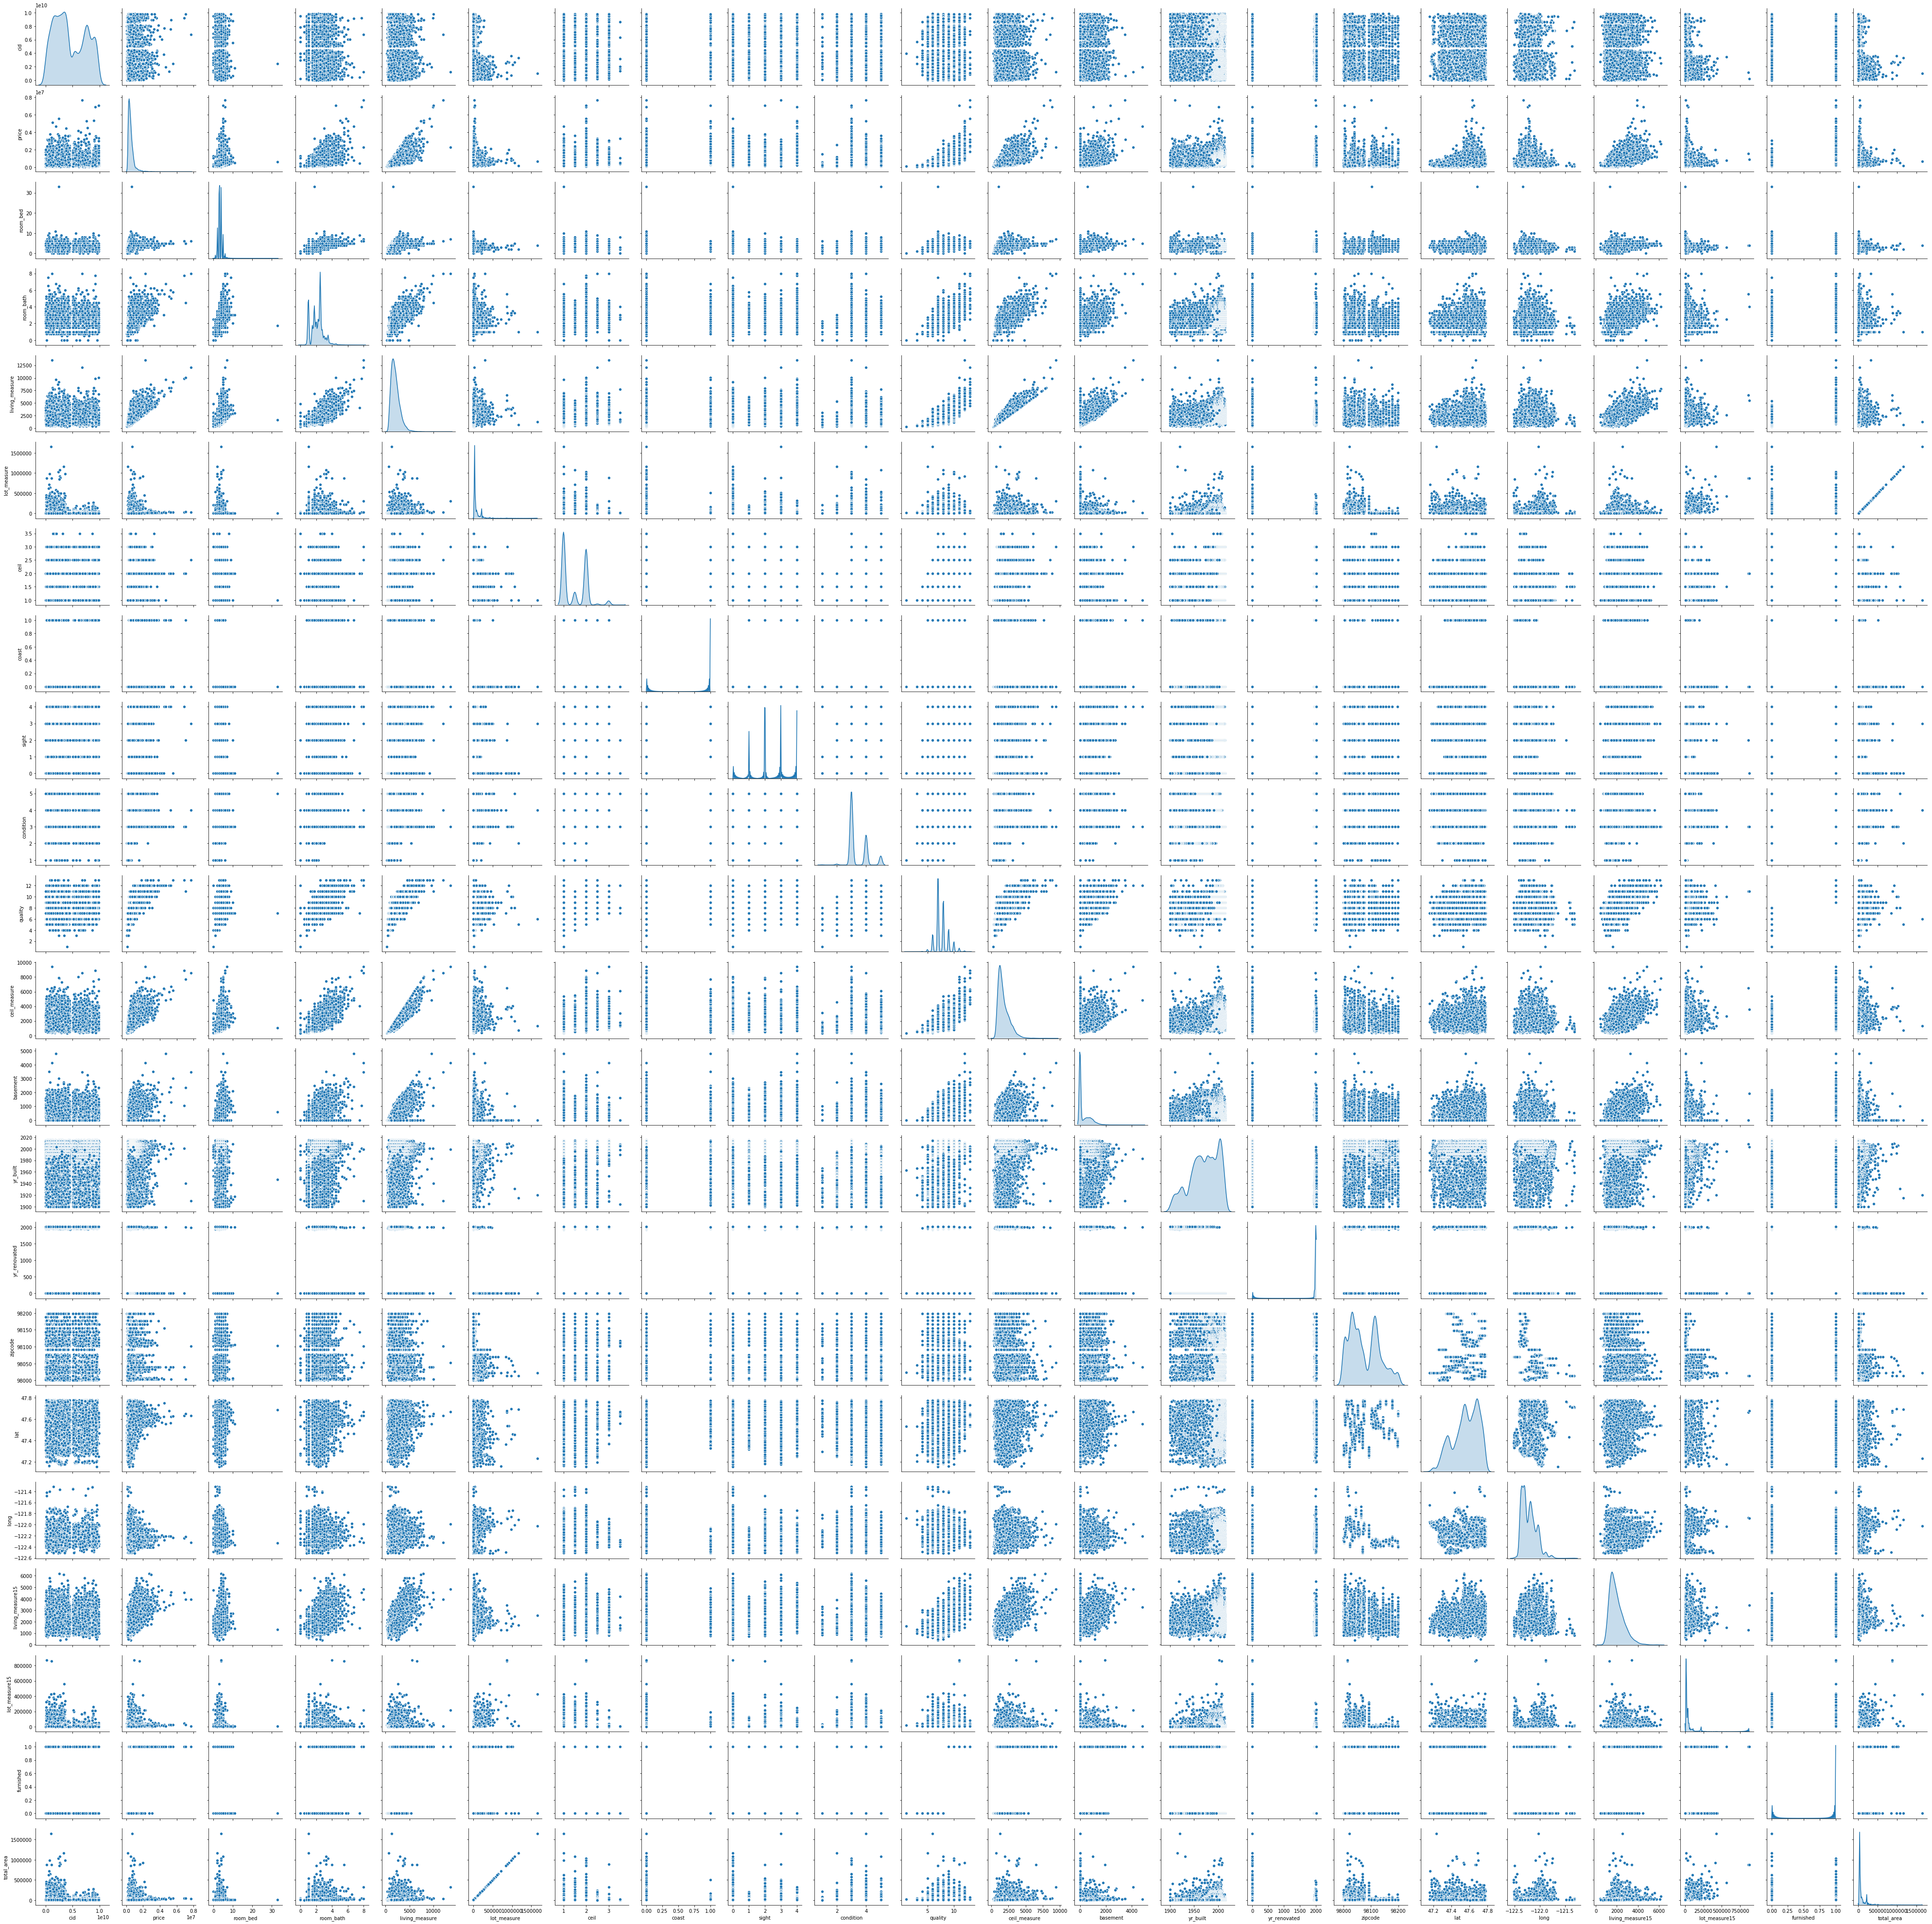

In [9]:
sns.pairplot(house_df, diag_kind='kde')

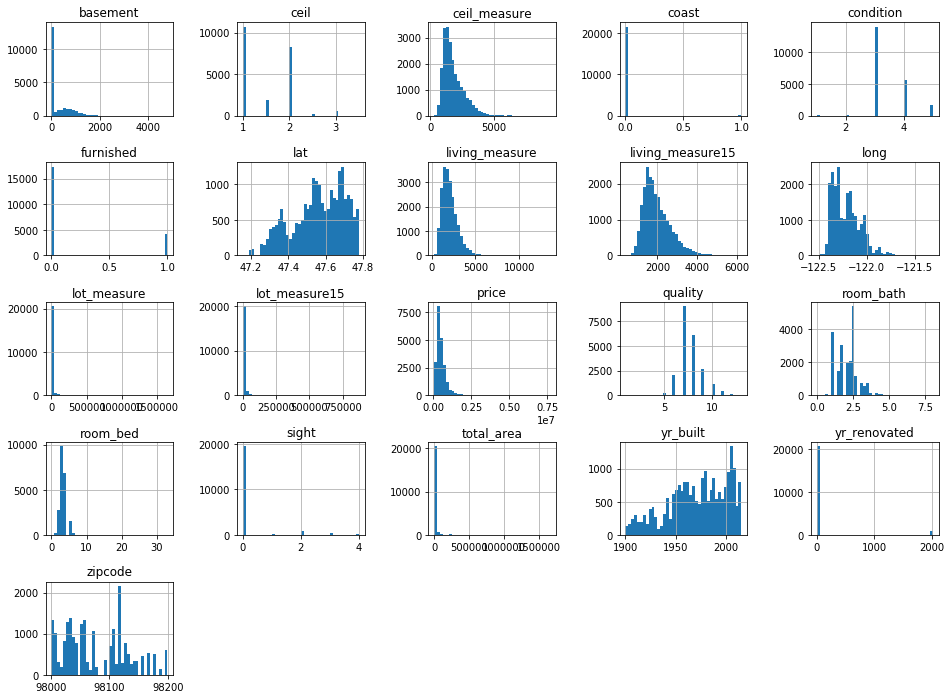

In [57]:
# Checking the distribution of all the numeric variables
house_df.hist(bins = 40, figsize=(16,12))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [73]:
#Lets check the correlation of independant variables with dependant variable Price
corr = house_df.corr()
corr

price  room_bed  room_bath  living_measure  lot_measure  \
price             1.000000  0.308338   0.525134        0.702044     0.089655   
room_bed          0.308338  1.000000   0.515884        0.576671     0.031703   
room_bath         0.525134  0.515884   1.000000        0.754665     0.087740   
living_measure    0.702044  0.576671   0.754665        1.000000     0.172826   
lot_measure       0.089655  0.031703   0.087740        0.172826     1.000000   
ceil              0.256786  0.175429   0.500653        0.353949    -0.005201   
coast             0.266331 -0.006582   0.063744        0.103818     0.021604   
sight             0.397346  0.079532   0.187737        0.284611     0.074710   
condition         0.036392  0.028472  -0.124982       -0.058753    -0.008958   
quality           0.667463  0.356967   0.664983        0.762704     0.113621   
ceil_measure      0.605566  0.477600   0.685342        0.876597     0.183512   
basement          0.323837  0.303093   0.283770        0.435043     0.015286   
yr_built          0.053982  0.154178   0.506019        0.318049     0.053080   
yr_renovated      0.126442  0.018841   0.050739        0.055363     0.007644   
zipcode          -0.053168 -0.152668  -0.203866       -0.199430    -0.129574   
lat               0.306919 -0.008931   0.024573        0.052529    -0.085683   
long              0.021571  0.129473   0.223042        0.240223     0.229521   
living_measure15  0.585374  0.391638   0.568634        0.756420     0.144608   
lot_measure15     0.082456  0.029244   0.087175        0.183286     0.718557   
furnished         0.565991  0.259268   0.484923        0.632947     0.118883   
total_area        0.104796  0.044310   0.104050        0.194209     0.999763   

                      ceil     coast     sight  condition   quality  ...  \
price             0.256786  0.266331  0.397346   0.036392  0.667463  ...   
room_bed          0.175429 -0.006582  0.079532   0.028472  0.356967  ...   
room_bath         0.500653  0.063744  0.187737  -0.124982  0.664983  ...   
living_measure    0.353949  0.103818  0.284611  -0.058753  0.762704  ...   
lot_measure      -0.005201  0.021604  0.074710  -0.008958  0.113621  ...   
ceil              1.000000  0.023698  0.029444  -0.263768  0.458183  ...   
coast             0.023698  1.000000  0.401857   0.016653  0.082775  ...   
sight             0.029444  0.401857  1.000000   0.045990  0.251321  ...   
condition        -0.263768  0.016653  0.045990   1.000000 -0.144674  ...   
quality           0.458183  0.082775  0.251321  -0.144674  1.000000  ...   
ceil_measure      0.523885  0.072075  0.167649  -0.158214  0.755923  ...   
basement         -0.245705  0.080588  0.276947   0.174105  0.168392  ...   
yr_built          0.489319 -0.026161 -0.053440  -0.361417  0.446963  ...   
yr_renovated      0.006338  0.092885  0.103917  -0.060618  0.014414  ...   
zipcode          -0.059121  0.030285  0.084827   0.003026 -0.184862  ...   
lat               0.049614 -0.014274  0.006157  -0.014941  0.114084  ...   
long              0.125419 -0.041910 -0.078400  -0.106500  0.198372  ...   
living_measure15  0.279885  0.086463  0.280439  -0.092824  0.713202  ...   
lot_measure15    -0.011269  0.030703  0.072575  -0.003406  0.119248  ...   
furnished         0.347749  0.069882  0.220250  -0.121902  0.788621  ...   
total_area        0.002637  0.023809  0.080693  -0.010219  0.130004  ...   

                  basement  yr_built  yr_renovated   zipcode       lat  \
price             0.323837  0.053982      0.126442 -0.053168  0.306919   
room_bed          0.303093  0.154178      0.018841 -0.152668 -0.008931   
room_bath         0.283770  0.506019      0.050739 -0.203866  0.024573   
living_measure    0.435043  0.318049      0.055363 -0.199430  0.052529   
lot_measure       0.015286  0.053080      0.007644 -0.129574 -0.085683   
ceil             -0.245705  0.489319      0.006338 -0.059121  0.049614   
coast             0.080588 -0.026161      0.092885  0.030285 -0.01427

In [74]:
#dayhours attribute contains string, converting it to date format for easier processing
labels = house_df['price']
conv_dates = [1 if values == 2014 else 0 for values in house_df.dayhours ]
house_df['dayhours'] = conv_dates

##### Get skewness of the features

In [75]:
skewness=[]
for i in house_df.columns:
    skewness.append(house_df[i].skew())
pd.DataFrame(data=skewness,index=house_df.columns,columns=['skewness']).sort_values(by='skewness',ascending=False)

skewness
lot_measure       13.060019
total_area        12.956067
coast             11.385108
lot_measure15      9.506743
yr_renovated       4.549493
price              4.021716
sight              3.395750
room_bed           1.974300
basement           1.577965
furnished          1.526232
living_measure     1.471555
ceil_measure       1.446664
living_measure15   1.108181
condition          1.032805
long               0.885053
quality            0.771103
ceil               0.616177
room_bath          0.511108
zipcode            0.405661
dayhours           0.000000
yr_built          -0.469805
lat               -0.485270

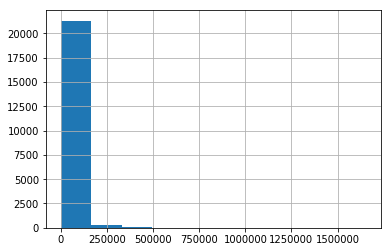

In [76]:
house_df.lot_measure.hist(bins=10)

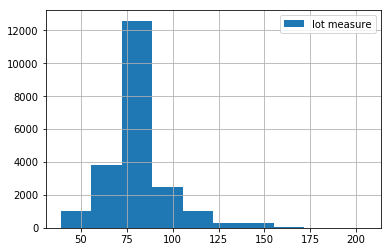

In [77]:
house_df['lot_measure'].apply(lambda x: np.log1p(x)**2).hist(bins=10,label='lot measure')
plt.legend()

as the transformed lot_measure attribute is having better distribution we can retain itto work further.

In [78]:
house_df.head()

dayhours    price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0         0  2000000         4       3.25            5640        35006   2.0   
1         0  1800000         4       3.50            3480         4000   2.0   
2         0  1700000         4       3.50            3950         6240   2.0   
3         0  1550000         3       3.25            3530         4920   2.0   
4         0  1290000         5       4.00            4360         8030   2.0   

   coast  sight  condition  ...  basement  yr_built  yr_renovated  zipcode  \
0      0      2          3  ...       740      2015             0    98006   
1      0      0          3  ...      1020      2015             0    98112   
2      0      0          3  ...         0      2015             0    98112   
3      0      0          3  ...       870      2015             0    98109   
4      0      0          3  ...         0      2015             0    98075   

       lat     long  living_measure15  lot_measure15  furnished  total_area  
0  47.5491 -122.104              4920          35033          1       40646  
1  47.6356 -122.281              2620           4000          1        7480  
2  47.6221 -122.290              2040           6240          1       10190  
3  47.6410 -122.357              1900           4200          1        8450  
4  47.5923 -121.973              3570           6185          1       12390  

[5 rows x 22 columns]

#### plt.figure(figsize=(16,12))
sns.heatmap(house_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

From above heatmap we can state that:
1. Price of the house is highly correlated with square footage of the home (living_measure 0.7), grade given to the housing unit, based on grading system (quality 0.67), square footage of house apart from basement (ceil_measure 0.61)
2. Price is correlated with Living room area in 2015 (living_measure15 0.59), Based on the quality of room (furnished 0.57), Number of bathrooms/bedrooms (room_bath 0.53)
3. Price is to be correlated with attributes like has been viewed (sight 0.4), square footage of the basement (basement 0.32), Number of bedrooms/House (room_bed 0.31), House which has a view to a waterfront (coast 0.27), Total floors (levels) in house (ceil 0.26)
So we can try different plots to explore these correlations further.

In [79]:
#trying to get house many years ago the house was built
house_df['house_age'] = 2019 - house_df.yr_built

In [80]:
house_df.head(20).tail()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
15         0  659000         2       2.50            1450         1213   2.0   
16         0  649000         3       2.00            1530         1442   3.0   
17         0  643950         3       2.25            1760         2122   3.0   
18         0  631000         3       2.25            1670         1396   2.0   
19         0  628000         5       2.75            2600         8160   2.0   

    coast  sight  condition  ...  yr_built  yr_renovated  zipcode      lat  \
15      0      0          3  ...      2015             0    98107  47.6692   
16      0      0          3  ...      2015             0    98107  47.6692   
17      0      0          3  ...      2015             0    98116  47.5633   
18      0      0          3  ...      2015             0    98115  47.6814   
19      0      0          3  ...      2015             0    98133  47.7348   

       long  living_measure15  lot_measure15  furnished  total_area  house_age  
15 -122.372              1620           1456          1        2663          4  
16 -122.372              1620           1456          1        2972          4  
17 -122.385              1420           1618          1        3882          4  
18 -122.288              1610           5191          1        3066          4  
19 -122.340              1600           8160          0       10760          4  

[5 rows x 23 columns]

In [81]:
#trying to get how recently the house was renovated
house_df['recency'] = 2019 - house_df.yr_renovated[house_df['yr_renovated'] != 0]

In [82]:
#for the houses which are not renoveted we are keeping house_age itself
house_df['recency'].fillna(house_df.house_age,inplace=True)

In [83]:
house_df.head(20).tail()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
15         0  659000         2       2.50            1450         1213   2.0   
16         0  649000         3       2.00            1530         1442   3.0   
17         0  643950         3       2.25            1760         2122   3.0   
18         0  631000         3       2.25            1670         1396   2.0   
19         0  628000         5       2.75            2600         8160   2.0   

    coast  sight  condition  ...  yr_renovated  zipcode      lat     long  \
15      0      0          3  ...             0    98107  47.6692 -122.372   
16      0      0          3  ...             0    98107  47.6692 -122.372   
17      0      0          3  ...             0    98116  47.5633 -122.385   
18      0      0          3  ...             0    98115  47.6814 -122.288   
19      0      0          3  ...             0    98133  47.7348 -122.340   

    living_measure15  lot_measure15  furnished  total_area  house_age  recency  
15              1620           1456          1        2663          4      4.0  
16              1620           1456          1        2972          4      4.0  
17              1420           1618          1        3882          4      4.0  
18              1610           5191          1        3066          4      4.0  
19              1600           8160          0       10760          4      4.0  

[5 rows x 24 columns]

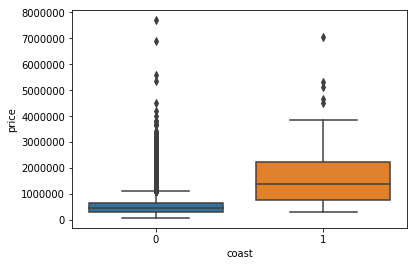

In [85]:
sns.boxplot(x="coast", y="price", data=house_df)

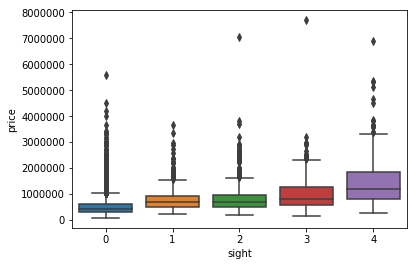

In [86]:
sns.boxplot(x="sight", y="price", data=house_df)

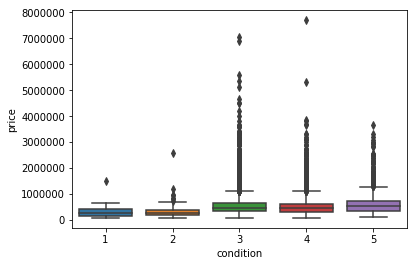

In [87]:
sns.boxplot(x="condition", y="price", data=house_df)

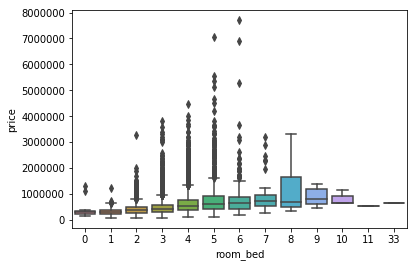

In [88]:
sns.boxplot(x="room_bed", y="price", data=house_df)

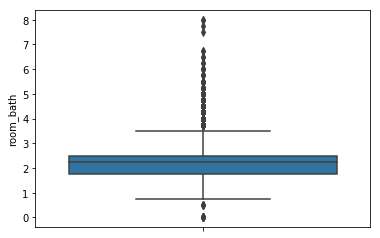

In [89]:
sns.boxplot(y="room_bath",  data=house_df)

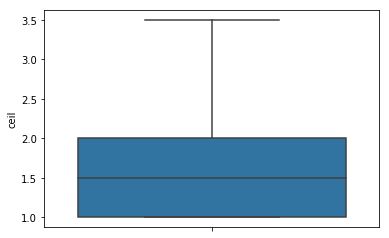

In [90]:
sns.boxplot(y="ceil",  data=house_df)

there are considerable outliers in all the features for which we have plotted boxplots above. We can consider removing outliers by replacing them with inter quartile range values

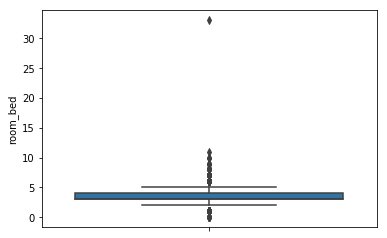

In [91]:
sns.boxplot(y="room_bed",  data=house_df)

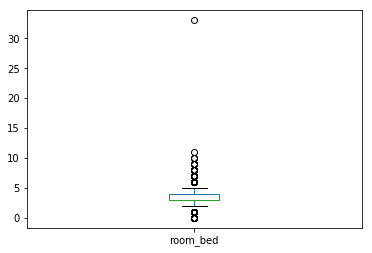

In [92]:
house_df.plot( y='room_bed', kind='box')
plt.show()

From the above boxplot we can say that, most of the houses sold are having bedrooms between 3 to 5. Lets futher plot a barchart for this. There are outliers with houses with very high/less no of bedrooms.
From simple data analysis, we can see that there is a house with 11 and 33 redrooms.

Text(0, 0.5, 'count')

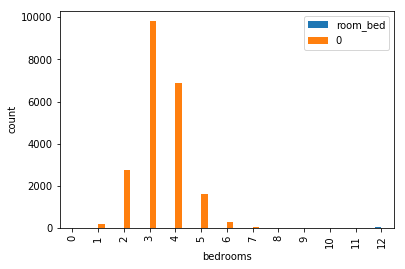

In [96]:
# house_df['room_bed'].value_counts().plot(kind='bar')
house_df.groupby('room_bed').size().reset_index().plot(kind='bar')
plt.xlabel('bedrooms')
plt.ylabel('count')

From bar plot we can conclude that houses with 3 bedrooms are sold most commonly, followed by that of 4. This information could be helpful for new developments.

Text(0.5, 1.0, 'price vs living measure')

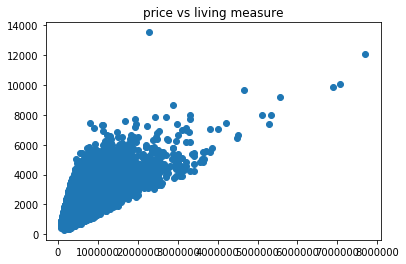

In [29]:
plt.scatter(house_df.price, house_df.living_measure)
plt.title("price vs living measure")

From above scatter plot, we can say that:
1. More the living measure, more the price of the house.
2. Data is scattered in linear direction.
3. There are some exceptions that houses with high living measure are sold less. This could be due to another factors affecting.

Text(0.5, 1.0, 'price vs living measure')

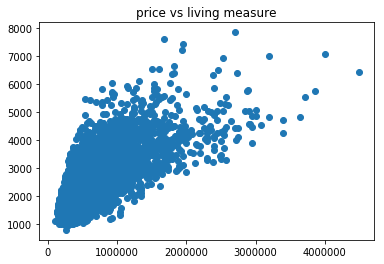

In [100]:
#we can check how the scatter plot looks like for houses with 4 bed rooms
plt.scatter(house_df.price[house_df.room_bed==4], house_df.living_measure[house_df.room_bed==4])
plt.title("price vs living measure")

Text(0.5, 1.0, 'price vs ceil measure')

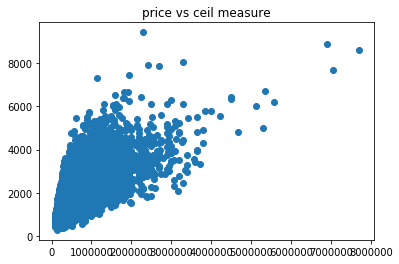

In [101]:
plt.scatter(house_df.price, house_df.ceil_measure)
plt.title("price vs ceil measure")

From above scatter we can state that:

Text(0.5, 1.0, 'price vs living measure 15')

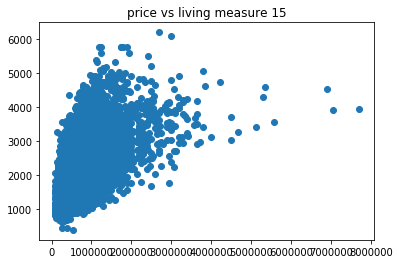

In [102]:
plt.scatter(house_df.price, house_df.living_measure15)
plt.title("price vs living measure 15")

Text(0.5, 1.0, 'price vs room bath')

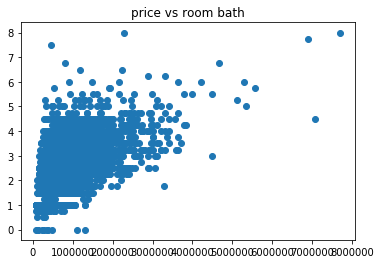

In [103]:
plt.scatter(house_df.price, house_df.room_bath)
plt.title("price vs room bath")

## density of house wrt lat. and lang.

Text(0.5, 67.99999999999994, 'Lattitude')

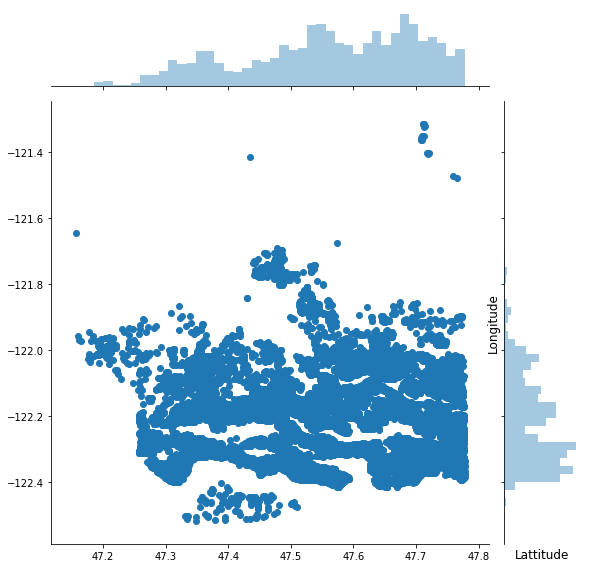

In [104]:
sns.jointplot(x=house_df.lat.values, y=house_df.long.values, size=8)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Lattitude', fontsize=12)

By setting alpha 0.1 we can see high density areas

Text(0.5, 67.99999999999994, 'Lattitude')

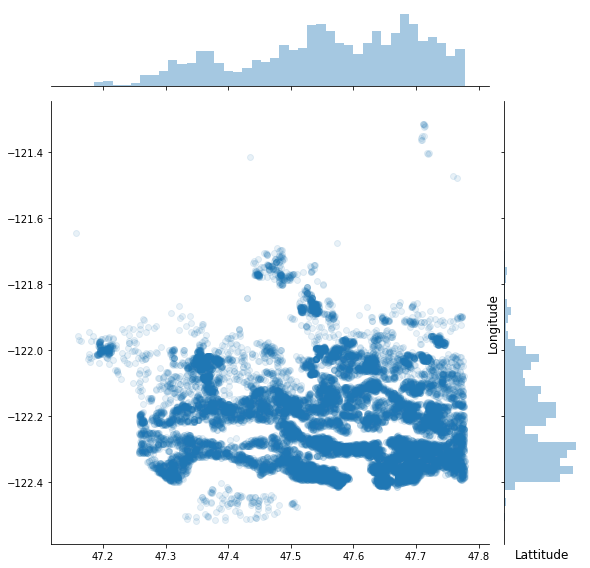

In [105]:
sns.jointplot(x=house_df.lat.values, y=house_df.long.values, size=8, alpha=0.1)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Lattitude', fontsize=12)

From above jointplot we can see that, There are many house between latitude -47.7 and -47.8. From longitude we can see many houses in -122.2 to -122.4.

Text(0.5, 1.0, 'price vs longitude/area')

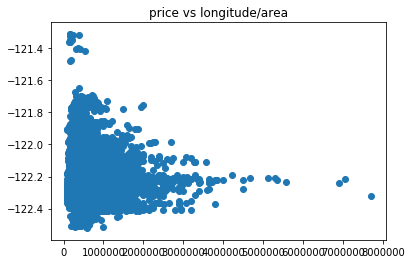

In [106]:
plt.scatter(house_df.price, house_df.long)
plt.title("price vs longitude/area")

From the above scatter plot we can say that houses in longitude area between -122.2 to -122.4 are sold at higher amount comparitively.

Text(0.5, 1.0, 'price vs latitude/area')

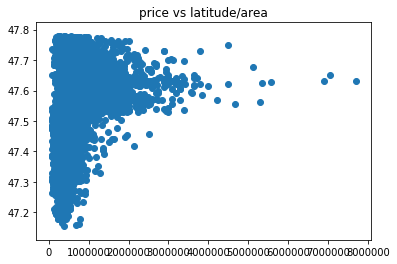

In [107]:
plt.scatter(house_df.price, house_df.lat)
plt.title("price vs latitude/area")

From the above scatter plot we can say that there are more houses in latitude between 47.7 to 47.8

Text(0.5, 1.0, 'price vs no of bedrooms')

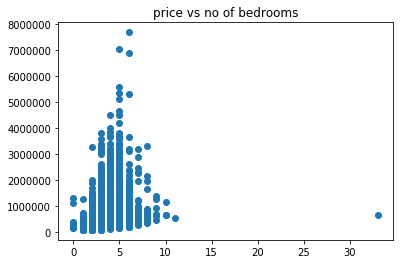

In [108]:
plt.scatter(house_df.room_bed, house_df.price)
plt.title("price vs no of bedrooms")

houses with 3/4 bedrooms are sold more.

Text(0.5, 1.0, 'price vs total area')

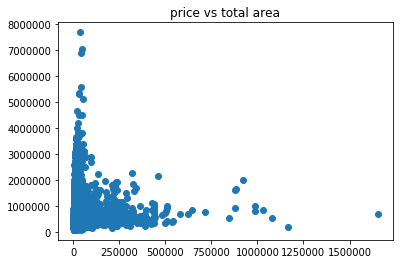

In [109]:
plt.scatter(house_df.total_area, house_df.price)
plt.title("price vs total area")

From above scatter plot, we can say that
1. Most of the houses are less than 500000 square feets total area.
2. Houses with total area less that 250000 square feet are sold to higher prices comparitively.

Text(0.5, 1.0, 'Coast vs Price')

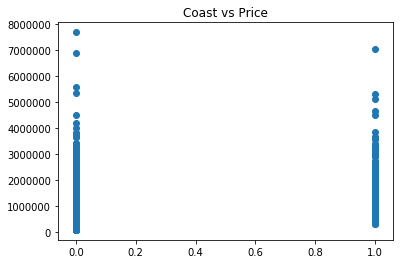

In [110]:
plt.scatter(house_df.coast,house_df.price)
plt.title("Coast vs Price")

Text(0, 0.5, 'count')

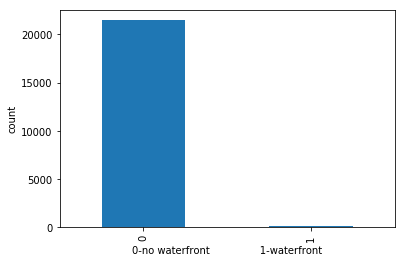

In [111]:
house_df['coast'].value_counts().plot(kind='bar')
plt.xlabel('0-no waterfront                1-waterfront')
plt.ylabel('count')

Most of the houses dont have view to waterfront and very few houses have waterfront view. The houses with waterfront are costlier than the ones with no waterfront

Text(0.5, 1.0, 'Furnished vs Price')

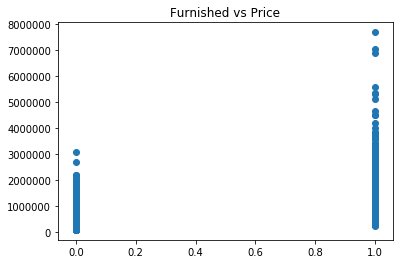

In [112]:
plt.scatter(house_df.furnished,house_df.price)
plt.title("Furnished vs Price")

Text(0, 0.5, 'count')

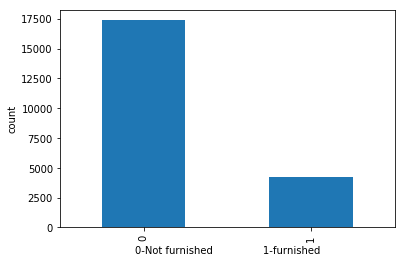

In [113]:
house_df['furnished'].value_counts().plot(kind='bar')
plt.xlabel('0-Not furnished                1-furnished')
plt.ylabel('count')

There are more houses which are not furnished and lesser houses are furnished. The furnished houses are costlier than the ones which are not furnished.

Text(0.5, 1.0, 'Condition vs Price')

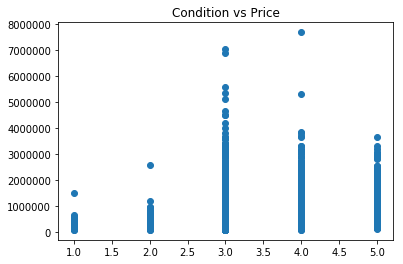

In [114]:
plt.scatter(house_df.condition,house_df.price)
plt.title("Condition vs Price")

Text(0, 0.5, 'count')

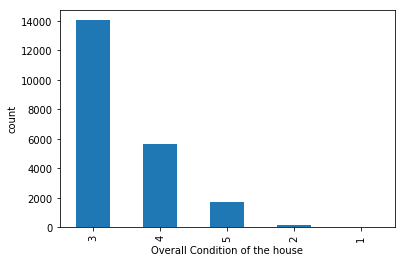

In [120]:
house_df['condition'].value_counts().plot(kind='bar')
plt.xlabel('Overall Condition of the house')
plt.ylabel('count')

The overall condition of most of the houses is 3 (good) followed by 4(better) and 5(best). There are few houses with 2(bad) followed by 1(Worst) condition too. From scatter plot we can say, better the condition of the house, costlier it is.

Text(0.5, 1.0, 'Quality-Grading System vs Price')

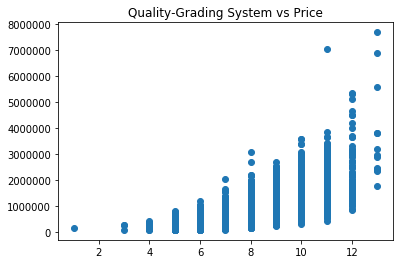

In [122]:
plt.scatter(house_df.quality,house_df.price)
plt.title("Quality-Grading System vs Price")

Text(0, 0.5, 'count')

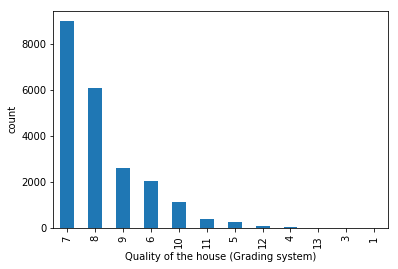

In [123]:
house_df['quality'].value_counts().plot(kind='bar')
plt.xlabel('Quality of the house (Grading system)')
plt.ylabel('count')

Very few or no houses are there with very high or very low quality. Most of the houses are graded 7 followed by 8 and 9. From scatter plot we can say, better the quality costlier the price the house is sold at.

Text(0.5, 1.0, 'House age built vs Price')

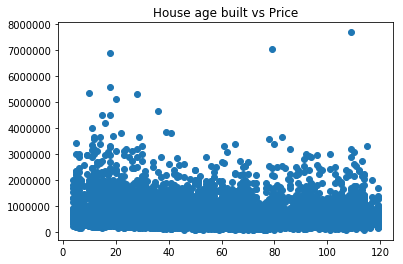

In [124]:
plt.scatter(house_df.house_age,house_df.price)
plt.title("House age built vs Price")

Text(0.5, 1.0, 'House age built/renovated vs Price')

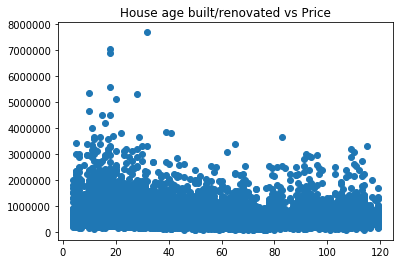

In [125]:
plt.scatter(house_df.recency,house_df.price)
plt.title("House age built/renovated vs Price")

We can say that recent the house(built/renovated) better the price, though this could be affected by the fact that the price could be affected by other factors too

Text(0, 0.5, 'count')

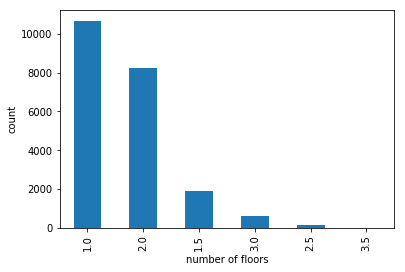

In [126]:
house_df.ceil.value_counts().plot(kind='bar')
plt.xlabel('number of floors')
plt.ylabel('count')

Text(0.5, 1.0, 'No of floors in the house vs Price')

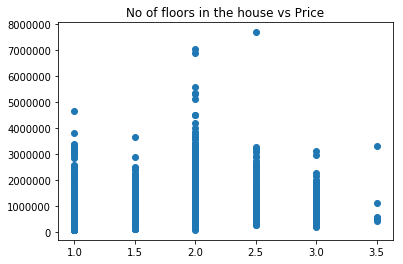

In [127]:
plt.scatter(house_df.ceil,house_df.price)
plt.title("No of floors in the house vs Price")

From bar plot we could say there are more houses with 1 floor followed by 2. From scatter plot we can say hoses with 2 floors are sold to higher prices than others.

# Liner Regression

In [131]:
model_df = house_df.drop(['price'],axis=1)

In [132]:
model_df.head()

dayhours  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0         0         4       3.25            5640        35006   2.0      0   
1         0         4       3.50            3480         4000   2.0      0   
2         0         4       3.50            3950         6240   2.0      0   
3         0         3       3.25            3530         4920   2.0      0   
4         0         5       4.00            4360         8030   2.0      0   

   sight  condition  quality  ...  yr_renovated  zipcode      lat     long  \
0      2          3       11  ...             0    98006  47.5491 -122.104   
1      0          3        9  ...             0    98112  47.6356 -122.281   
2      0          3       11  ...             0    98112  47.6221 -122.290   
3      0          3        9  ...             0    98109  47.6410 -122.357   
4      0          3       10  ...             0    98075  47.5923 -121.973   

   living_measure15  lot_measure15  furnished  total_area  house_age  recency  
0              4920          35033          1       40646          4      4.0  
1              2620           4000          1        7480          4      4.0  
2              2040           6240          1       10190          4      4.0  
3              1900           4200          1        8450          4      4.0  
4              3570           6185          1       12390          4      4.0  

[5 rows x 23 columns]

### splitting the data into train(70) and test(30)

In [184]:
x_train , x_test , y_train , y_test = train_test_split(model_df , labels , test_size = 0.30,random_state =20)

## Linear Regression

In [185]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [186]:
regression.score(x_test,y_test)

0.6992878823494508

## Gradient Boosting Regressor

In [187]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [188]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [189]:
clf.score(x_test, y_test)

0.8822074168341635

## Random Forest Regressor

In [190]:
rfr_regressor = RandomForestRegressor(n_estimators =600, random_state = 0) 

In [191]:
rfr_regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [192]:
rfr_regressor.score(x_test, y_test)

0.8708592128290485

## Decision Tree Regressor

In [193]:
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 

In [194]:
dtr_regressor = DecisionTreeRegressor(random_state=0, max_depth=3)
dtr_regressor.fit(x_train , y_train)
feature_importances = dtr_regressor.feature_importances_

feature_names = model_df.columns[:]
print(feature_names)

k = 2
print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['dayhours', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'house_age', 'recency'],
      dtype='object')
[0.         0.         0.         0.31670517 0.         0.
 0.         0.         0.         0.52489578 0.         0.
 0.         0.         0.         0.15839904 0.         0.
 0.         0.         0.         0.         0.        ]
Index(['quality', 'living_measure'], dtype='object') [0.         0.         0.         0.31670517 0.         0.
 0.         0.         0.         0.52489578 0.         0.
 0.         0.         0.         0.15839904 0.         0.
 0.         0.         0.         0.         0.        ]


In [195]:
from IPython.display import Image  
from sklearn import tree
from os import system

model_df_Tree_File = open('d:\model_df_tree.dot','w')
dot_data = tree.export_graphviz(regressor, out_file=model_df_Tree_File, feature_names =(['dayhours', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'house_age', 'recency']) )
model_df_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

system("dot -Tpng D:\model_df_tree.dot -o D:/model_df_tree.png")
#Image("d:\model_df_tree.png")

1

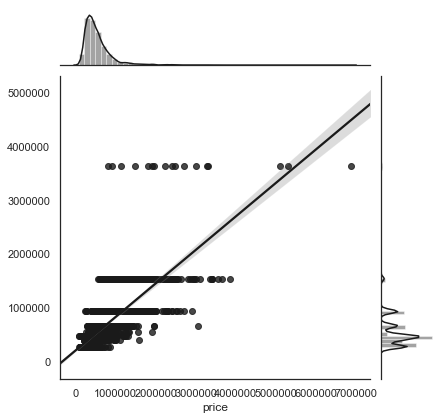

In [196]:
y_pred = regressor.predict(x_test)
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [197]:
dtr_regressor.score(x_test, y_test)

0.5813718160883555

## KNN Regression

In [198]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test1 = pd.DataFrame(x_test_scaled)

In [202]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(x_train1, y_train)  #fit the model
    pred=knn_model.predict(x_test1) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 219429.76804476182
RMSE value for k=  2 is: 191815.9152423247
RMSE value for k=  3 is: 182266.33426530528
RMSE value for k=  4 is: 177364.0137428266
RMSE value for k=  5 is: 175705.13326219522
RMSE value for k=  6 is: 174376.23904583819
RMSE value for k=  7 is: 174318.50211499288
RMSE value for k=  8 is: 174571.14556338248
RMSE value for k=  9 is: 175606.57380634974
RMSE value for k=  10 is: 175810.28594278038
RMSE value for k=  11 is: 176175.96023675866
RMSE value for k=  12 is: 175992.4282776088
RMSE value for k=  13 is: 176545.56225162966
RMSE value for k=  14 is: 177387.82366191613
RMSE value for k=  15 is: 178290.36845919673
RMSE value for k=  16 is: 178708.2854511396
RMSE value for k=  17 is: 179040.11988376646
RMSE value for k=  18 is: 180196.81430688978
RMSE value for k=  19 is: 180285.56503121235
RMSE value for k=  20 is: 180790.81379972078


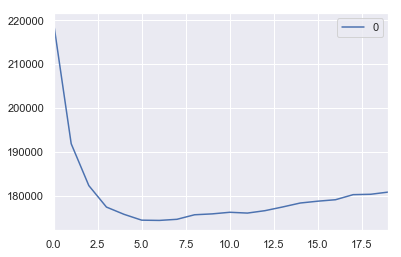

In [203]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## storing results of all the models in single array

In [209]:
# storing results of all the models in single array
model_scores = []
acc_scr = dict()
reg_scr = regression.score(x_test,y_test)
acc_scr['Linear Regression']=reg_scr

#model_scores.append(acc_scr)

gbr_scr = clf.score(x_test, y_test)
rfr_scr = rfr_regressor.score(x_test, y_test)
dtr_scr = dtr_regressor.score(x_test, y_test)
knn_scr = knn_model.score(x_test1, y_test)

acc_scr['Gradiant Boosting Regressor']=gbr_scr
acc_scr['Random Forest Regressor']=gbr_scr
acc_scr['Decision Tree Regressor']=dtr_scr
acc_scr['KNN']=knn_scr

In [210]:
acc_scr

{'Linear Regression': 0.6992878823494508,
 'Gradiant Boosting Regressor': 0.8861712980977607,
 'Random Forest Regressor': 0.8861712980977607,
 'Decision Tree Regressor': 0.5813718160883555,
 'KNN': 0.7671003132997656}

### From the model scores print above, we can see that Gradiant Boosting Regressor and Random Forest Regressor are performing best amongst all.